In [34]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

# sns.set_style('darkgrid')

0. load csv files
    - combine all csv files as one df

In [35]:
CSV_FILE_DIR_HEAD = "/Volumes/MySSD/PycharmProjects/MIS-COV19/"
CSV_FILE_DIR = CSV_FILE_DIR_HEAD + "dataset"
CSV_FILE_NAMES = os.listdir(CSV_FILE_DIR)

dfs = pd.DataFrame()
for CSV_FILE_NAME in CSV_FILE_NAMES:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR + '/' + CSV_FILE_NAME) 
        dfs = pd.concat([dfs,df])
        
news_publishers = dfs['publisher'].unique()
print("# Publishers: ", news_publishers.shape[0])
print(news_publishers)

# Publishers:  15
['Business Insider' 'CBS News' 'Chicago Sun-Times' 'FiveThirtyEight'
 'PBS NewsHour' 'National Public Radio (NPR)' 'Slate' 'CNBC'
 'The Atlantic' 'ABC News' 'The Mercury News' 'The New Yorker' 'The Verge'
 'The Washington Post' 'Reuters']


1. publisher distribution
    - x-axis: publishers
    - y-axis: # news  
    

Business Insider
# News:  158
CBS News
# News:  67
Chicago Sun-Times
# News:  322
FiveThirtyEight
# News:  2
PBS NewsHour
# News:  10
National Public Radio (NPR)
# News:  92
Slate
# News:  24
CNBC
# News:  46
The Atlantic
# News:  13
ABC News
# News:  18
The Mercury News
# News:  17
The New Yorker
# News:  12
The Verge
# News:  139
The Washington Post
# News:  33
Reuters
# News:  67
------------
Total # News:  1020


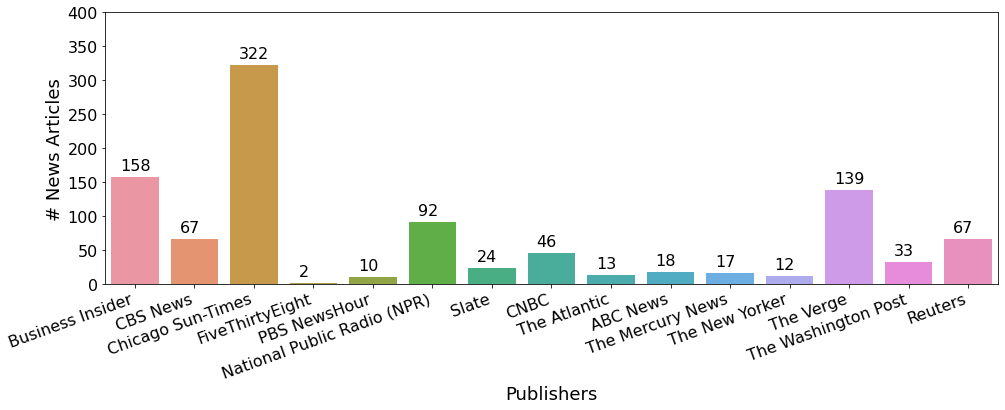

In [56]:
total_news = 0

news_publishers = []
news_nums = []
for CSV_FILE_NAME in CSV_FILE_NAMES:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR + '/' + CSV_FILE_NAME) 
        print(df['publisher'][0])
        print("# News: ", df.shape[0])
        
        news_publishers.append(df['publisher'][0])
        news_nums.append(df.shape[0])
        
        total_news += df.shape[0]
print("------------")
print("Total # News: ", total_news)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=news_publishers,y=news_nums)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.xticks(rotation=20, horizontalalignment='right')
plt.xlabel('Publishers')
plt.ylabel('# News Articles')
plt.ylim([0,400])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publisher_newsNum.eps', bbox_inches='tight')
plt.show()

2. publish_date distribution
    - x-axis: date
    - y-axis: # news 

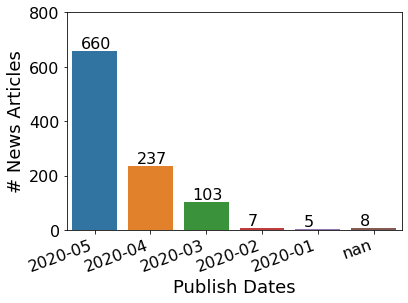

In [55]:
publish_dates = dfs['publish_date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    if date == 'nan':
        nums[idx] = 0
    else:
        dates[idx] = date[:7]
        time_array = time.strptime(date, "%Y-%m-%d")
        nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

# plt.figure(figsize=(16,5))
ax = sns.countplot(list(dates))
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.xticks(rotation=20, horizontalalignment='right')
plt.xlabel('Publish Dates')
plt.ylabel('# News Articles')
plt.ylim([0,800])
# ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publishDate_count.eps', bbox_inches='tight')
plt.show()

3. author distribution
    - x-axis: # authors
    - y-axis: # news 

KeyError: 'age'

4. distributions related to title and bodytext

4.1. 
    - x-axis: 
    - y-axis: 